still need to include pydot on install [pydot](http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will)


sudo /opt/anaconda/bin/pip uninstall pyparsing

sudo /opt/anaconda/bin/pip install -Iv https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz#md5=9be0fcdcc595199c646ab317c1d9a709

sudo /opt/anaconda/bin/pip install pydot

sudo yum install pydot

In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from IPython.display import Image
import StringIO, pydot
%matplotlib inline

In [8]:
carseats_df = pd.read_csv("../data/Carseats.csv")
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


(array([  6.,  16.,  47.,  83.,  89.,  79.,  40.,  29.,   8.,   3.]),
 array([  0.   ,   1.627,   3.254,   4.881,   6.508,   8.135,   9.762,
         11.389,  13.016,  14.643,  16.27 ]),
 <a list of 10 Patch objects>)

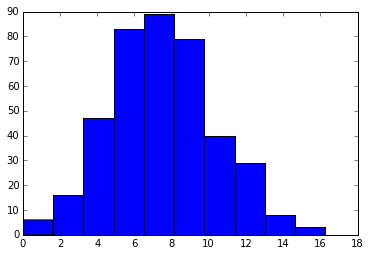

In [9]:
# Convert other string variables to numeric
carseats_df["ShelveLoc"] = pd.factorize(carseats_df["ShelveLoc"])[0]
carseats_df["Urban"] = pd.factorize(carseats_df["Urban"])[0]
carseats_df["US"] = pd.factorize(carseats_df["US"])[0]
# We want to add a binary response variable High (High Sales). We build a histogram to 
# determine the cut point.
plt.hist(carseats_df["Sales"])

In [10]:
# create a binary response variable HighSales and add to dataframe
carseats_df["High"] = carseats_df["Sales"].map(lambda x: 0 if x <= 8 else 1)
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,0,0,1
1,11.22,111,48,16,260,83,1,65,10,0,0,1
2,10.06,113,35,10,269,80,2,59,12,0,0,1
3,7.40,117,100,4,466,97,2,55,14,0,0,0
4,4.15,141,64,3,340,128,0,38,13,0,1,0


In [ ]:
# fit a decision tree to predict High from the data. We remove Sales because High is
# derived from Sales and is thus correlated to the response
collist = [x for x in carseats_df.columns if x not in ('Sales', 'High')]
clf = DecisionTreeClassifier()
X = carseats_df[collist].values
y = carseats_df["High"].values
clf.fit(X, y)

# Visualize tree
dot_data = StringIO.StringIO()
export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [23]:
X


array([[138,  73,  11, ...,  17,   0,   0],
       [111,  48,  16, ...,  10,   0,   0],
       [113,  35,  10, ...,  12,   0,   0],
       ..., 
       [162,  26,  12, ...,  18,   0,   0],
       [100,  79,   7, ...,  12,   0,   0],
       [134,  37,   0, ...,  16,   0,   0]])

In [18]:
clf.tree_.feature

array([ 4,  5,  1, -2,  3, -2, -2, -2,  5,  7,  4, -2, -2, -2,  6,  1,  3,
        4,  3, -2, -2, -2, -2,  5, -2,  4,  0, -2, -2,  0, -2, -2,  2,  0,
       -2,  4, -2,  5, -2, -2,  3,  7, -2, -2,  7,  3, -2, -2, -2])

In [12]:
Xr, Xt, yr, yt = train_test_split(X, y, train_size=250, test_size=150, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(Xr, yr)
ypred = clf.predict(Xt)
(confusion_matrix(yt, ypred), accuracy_score(yt, ypred))

(array([[55, 27],
        [24, 44]]), 0.66000000000000003)

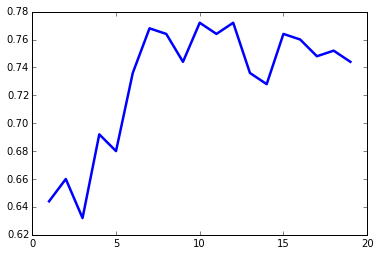

In [13]:
kfold = KFold(Xr.shape[0], n_folds=10)
accs = []
max_depths = range(1, 20)
for max_depth in max_depths:
    k_accs = []
    for train, test in kfold:
        Xtrain, Xtest, ytrain, ytest = Xr[train], Xr[test], yr[train], yr[test]
        clf = DecisionTreeClassifier(max_depth=max_depth)
        clf.fit(Xtrain, ytrain)
        ypred = clf.predict(Xtest)
        k_accs.append(accuracy_score(ytest, ypred))
    accs.append(np.mean(k_accs))
# plot the accuracies as a function of max_depth
plt.plot(max_depths, accs, linewidth=2.5)

In [14]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(Xr, yr)
ypred = clf.predict(Xt)
confusion_matrix(yt, ypred), accuracy_score(yt, ypred)

(array([[61, 21],
        [27, 41]]), 0.68000000000000005)